In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
df=pd.read_csv('gdrive/My Drive/Understanding Artificial Intelligence/workshop 2/results-2021-cefas-website.csv')
df

,Phytoplankton Monitoring Programme results,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Sample number,Production area,Bed ID,Local authority,Grid reference\n\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessot...,Prorocentrum cordatum \ncells L-1\n(Venerupin),NaN,NaN
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,04/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,04/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,05/01/2021,ND,ND,ND,400,ND,ND,ND,NaN,NaN
4,4/21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,05/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,Alexandrium spp. (PSP) - 40 cells/litre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878,Dinophysiaceae/Prorocentrum lima (DSP) - 100 c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
879,"Pseudo-nitzschia spp. (ASP) - 150,000 cells/litre",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880,Phytoplankton cell count ? trigger Level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df = df[:828]

In [ ]:
df

,Sample number,Production area,Bed ID,Local authority,Grid reference\n\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessotoxin),Prorocentrum cordatum \ncells L-1\n(Venerupin),NaN,NaN
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,04/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,04/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,05/01/2021,ND,ND,ND,400,ND,ND,ND,NaN,NaN
4,4/21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,05/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
5,5/21,Blackwater,B14AD,Maldon DC,TM04060768,St Peters Flats,06/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,853/21,St Austell Bay,B70AE,Cornwall PHA,SX05744972,Ropehaven Outer,25/10/2021,ND,40,ND,7080,ND,ND,ND,NaN,NaN
825,854/21,Crouch,B015Y,Maldon DC,TQ90429738,Althorne,26/10/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
826,855/21,Lyme Bay,B090M,Torbay BC,UNVERIFIED,Site 1,25/10/2021,ND,40,ND,ND,ND,ND,ND,NaN,NaN
827,856/21,Burry Inlet,B038I,City and Council of Swansea,SS50509590,South East 4,27/10/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN


# DATA CLEANING

In [ ]:
def clean_data(df):
    df["Alexandrium spp. \ncells L-1\n(PSP)"] = df["Alexandrium spp. \ncells L-1\n(PSP)"].replace("ND", 0)
    df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].replace("ND", 0)
    df["Dinophysiaceae \ncells L-1\n(DSP)"] = df["Dinophysiaceae \ncells L-1\n(DSP)"].replace("ND", 0)
    df["Prorocentrum lima \ncells L-1\n(DSP)"] = df["Prorocentrum lima \ncells L-1\n(DSP)"].replace("ND", 0) 
    df["Alexandrium spp. \ncells L-1\n(PSP)"] = pd.to_numeric(df["Alexandrium spp. \ncells L-1\n(PSP)"], errors='coerce')
    df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = pd.to_numeric(df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "], errors='coerce') 
    df["Dinophysiaceae \ncells L-1\n(DSP)"] = pd.to_numeric(df["Dinophysiaceae \ncells L-1\n(DSP)"], errors='coerce') 
    df["Prorocentrum lima \ncells L-1\n(DSP)"] = pd.to_numeric(df["Prorocentrum lima \ncells L-1\n(DSP)"], errors='coerce')

In [ ]:
clean_data(df)

In [ ]:
df["Alexandrium spp. \ncells L-1\n(PSP)"] = df["Alexandrium spp. \ncells L-1\n(PSP)"].fillna(-1)
df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].fillna(-1)
df["Dinophysiaceae \ncells L-1\n(DSP)"] = df["Dinophysiaceae \ncells L-1\n(DSP)"].fillna(-1)
df["Prorocentrum lima \ncells L-1\n(DSP)"] = df["Prorocentrum lima \ncells L-1\n(DSP)"].fillna(-1) 

# DATA LABELLING

In [ ]:
thresholds = {"Alexandrium spp. \ncells L-1\n(PSP)" : 40, "Dinophysiaceae \ncells L-1\n(DSP)" : 100, "Prorocentrum lima \ncells L-1\n(DSP)" : 100, "Pseudo-nitzschia spp. \ncells L-1\n(ASP) " : 150000}

In [ ]:
def check_thresholds(df):
    t = []
    for i,j in enumerate(df["Sample number"]):
        alexandrium = df.iloc[i]["Alexandrium spp. \ncells L-1\n(PSP)"] 
        pseudo_nitzschia = df.iloc[i]["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]
        dinophysiaceae = df.iloc[i]["Dinophysiaceae \ncells L-1\n(DSP)"]
        prorocentrum = df.iloc[i]["Prorocentrum lima \ncells L-1\n(DSP)"]
 
        threshold_reached = 0
        if pseudo_nitzschia >= thresholds["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]:
            threshold_reached = 1
        elif dinophysiaceae >= thresholds["Dinophysiaceae \ncells L-1\n(DSP)"]:
            threshold_reached = 1
        elif prorocentrum >= thresholds["Prorocentrum lima \ncells L-1\n(DSP)"]:
            threshold_reached = 1 
        elif alexandrium >= thresholds["Alexandrium spp. \ncells L-1\n(PSP)"]:
            threshold_reached = 1 
 
        t.append(threshold_reached)
 
    return t

In [ ]:
thresholds_reached = check_thresholds(df)
df['thresholds_reached'] = thresholds_reached
pd.DataFrame.to_csv(df, 'gdrive/My Drive/Understanding Artificial Intelligence/workshop 2/thresholds_cleaned.csv', sep=',', index=False)

In [ ]:
x = pd.read_csv('gdrive/My Drive/Understanding Artificial Intelligence/workshop 2/thresholds_cleaned.csv', usecols=["Pseudo-nitzschia spp. \ncells L-1\n(ASP) ", "Dinophysiaceae \ncells L-1\n(DSP)", "Prorocentrum lima \ncells L-1\n(DSP)", "Alexandrium spp. \ncells L-1\n(PSP)"], na_values = ['no info', '.'])

In [ ]:
y = pd.read_csv('gdrive/My Drive/Understanding Artificial Intelligence/workshop 2/thresholds_cleaned.csv', usecols=["thresholds_reached"])

In [ ]:
x

,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP)
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,400.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
823,0.0,40.0,0.0,7080.0
824,0.0,0.0,0.0,0.0
825,0.0,40.0,0.0,0.0
826,0.0,0.0,0.0,0.0


# DEEP LEARNING

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
from keras.utils import np_utils
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)

In [ ]:
%matplotlib inline

In [ ]:
# ### Normalization of the data
# from sklearn.preprocessing import MinMaxScaler
# # normalizing the data between 0 & 1
# sc= MinMaxScaler(feature_range=(0,1))

# # Storing the fit object for later reference
# x_train= sc.fit_transform(x_train)
# x_test= sc.fit_transform(x_test)
# y_train= y_train.values.reshape(-1,1)
# y_train= sc.fit_transform(y_train)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=888)

In [ ]:
model = Sequential()
model.add(Dense(units=1000, activation='relu', input_shape=(4,)))
model.add(Dropout(0.9))
model.add(Dense(units=5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              5000      
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 5005      
                                                                 
 dropout_1 (Dropout)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 10,011
Trainable params: 10,011
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start= time.time()
history = model.fit(x_train, y_train,
 batch_size=16,
 epochs=10,
 verbose=1,
 validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
end= time.time()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Time taken:', end-start)

Epoch 1/10
42/42 [==============================] - 2s 17ms/step - loss: 5.5025 - accuracy: 0.6344 - val_loss: 1.2276 - val_accuracy: 0.9036
Epoch 2/10
42/42 [==============================] - 0s 7ms/step - loss: 4.8451 - accuracy: 0.6813 - val_loss: 3.8087 - val_accuracy: 0.6928
Epoch 3/10
42/42 [==============================] - 0s 5ms/step - loss: 4.8623 - accuracy: 0.6782 - val_loss: 1.4958 - val_accuracy: 0.8976
Epoch 4/10
42/42 [==============================] - 0s 6ms/step - loss: 4.7100 - accuracy: 0.6918 - val_loss: 1.6726 - val_accuracy: 0.8916
Epoch 5/10
42/42 [==============================] - 0s 6ms/step - loss: 4.3242 - accuracy: 0.7130 - val_loss: 1.6726 - val_accuracy: 0.8916
Epoch 6/10
42/42 [==============================] - 0s 7ms/step - loss: 3.5252 - accuracy: 0.7628 - val_loss: 1.7655 - val_accuracy: 0.8855
Epoch 7/10
42/42 [==============================] - 0s 7ms/step - loss: 2.4802 - accuracy: 0.8369 - val_loss: 1.7655 - val_accuracy: 0.8855
Epoch 8/10
42/42 [=

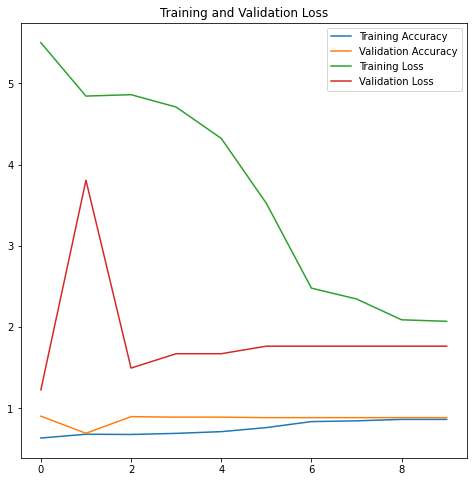

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()

#**FIRST ARCHITECTURAL MODIFICATION**- Sigmoid with adam optimizer, 10 epoch and drop out 0.7 and 0.2

In [ ]:
model = Sequential()
model.add(Dense(units=1000, kernel_initializer='uniform', activation='sigmoid', input_shape=(4,)))
model.add(Dropout(0.7))
model.add(Dense(units=100,kernel_initializer='uniform', activation='sigmoid'))
model.add(Dense(units=50, kernel_initializer='uniform', activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1000)              5000      
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               100100    
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 110,201
Trainable params: 110,201
Non-tr

In [ ]:
start= time.time()
history = model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
end= time.time()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Time taken:', end-start)

Epoch 1/10
42/42 [==============================] - 2s 19ms/step - loss: 0.5025 - accuracy: 0.8384 - val_loss: 0.3775 - val_accuracy: 0.8855
Epoch 2/10
42/42 [==============================] - 0s 12ms/step - loss: 0.3618 - accuracy: 0.8852 - val_loss: 0.3556 - val_accuracy: 0.8855
Epoch 3/10
42/42 [==============================] - 0s 10ms/step - loss: 0.3608 - accuracy: 0.8852 - val_loss: 0.3533 - val_accuracy: 0.8855
Epoch 4/10
42/42 [==============================] - 1s 13ms/step - loss: 0.3523 - accuracy: 0.8852 - val_loss: 0.3441 - val_accuracy: 0.8855
Epoch 5/10
42/42 [==============================] - 0s 12ms/step - loss: 0.3250 - accuracy: 0.8852 - val_loss: 0.2960 - val_accuracy: 0.8855
Epoch 6/10
42/42 [==============================] - 1s 13ms/step - loss: 0.2865 - accuracy: 0.8852 - val_loss: 0.2615 - val_accuracy: 0.8855
Epoch 7/10
42/42 [==============================] - 1s 13ms/step - loss: 0.2553 - accuracy: 0.8852 - val_loss: 0.2495 - val_accuracy: 0.8855
Epoch 8/10
42

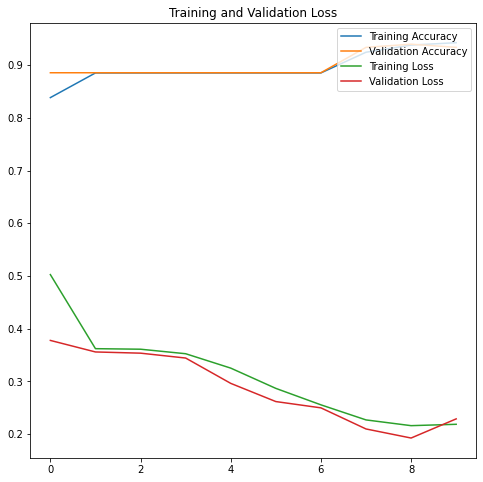

In [ ]:
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()

#**SECOND ARCHITECTUTAL MODIFICATION**- Tanh with adam optimizer, 20 epoch and dropout of 0.5

In [ ]:
model = Sequential()
model.add(Dense(units=100, kernel_initializer='uniform', activation='tanh', input_shape=(4,)))
model.add(Dropout(0.5))
model.add(Dense(units=5,kernel_initializer='uniform', activation='tanh'))
model.add(Dense(1, kernel_initializer='uniform', activation='tanh'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               500       
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 5)                 505       
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,011
Trainable params: 1,011
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start= time.time()
history = model.fit(x_train, y_train, batch_size=16, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
end= time.time()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Time taken:', end-start)

Epoch 1/20
42/42 [==============================] - 2s 12ms/step - loss: 1.3820 - accuracy: 0.8852 - val_loss: 1.0662 - val_accuracy: 0.8855
Epoch 2/20
42/42 [==============================] - 0s 7ms/step - loss: 0.9586 - accuracy: 0.8852 - val_loss: 0.4002 - val_accuracy: 0.8855
Epoch 3/20
42/42 [==============================] - 0s 5ms/step - loss: 0.3132 - accuracy: 0.8852 - val_loss: 0.2475 - val_accuracy: 0.8855
Epoch 4/20
42/42 [==============================] - 0s 6ms/step - loss: 0.3154 - accuracy: 0.8852 - val_loss: 0.2378 - val_accuracy: 0.8855
Epoch 5/20
42/42 [==============================] - 0s 7ms/step - loss: 0.2512 - accuracy: 0.8852 - val_loss: 0.2295 - val_accuracy: 0.8855
Epoch 6/20
42/42 [==============================] - 0s 7ms/step - loss: 0.3234 - accuracy: 0.8852 - val_loss: 0.2615 - val_accuracy: 0.8855
Epoch 7/20
42/42 [==============================] - 0s 7ms/step - loss: 0.3408 - accuracy: 0.8852 - val_loss: 0.2437 - val_accuracy: 0.8855
Epoch 8/20
42/42 [=

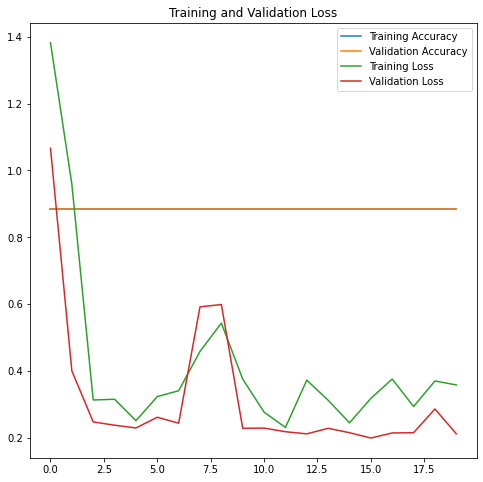

In [ ]:
epochs=20
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()

#**THIRD ARCHITECTURAL MODIFICATION**- RELU with sigmoid, 15 epoch, adam optimizer and dropout of 0.2

In [ ]:
model = Sequential()
model.add(Dense(units=1000, kernel_initializer='uniform', activation='relu', input_shape=(4,)))
model.add(Dense(units=100,kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1000)              5000      
                                                                 
 dense_11 (Dense)            (None, 100)               100100    
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 105,201
Trainable params: 105,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start= time.time()
history = model.fit(x_train, y_train, batch_size=16, epochs=15, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
end= time.time()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Time taken:', end-start)

Epoch 1/15
42/42 [==============================] - 2s 19ms/step - loss: 17.7628 - accuracy: 0.7719 - val_loss: 1.8836 - val_accuracy: 0.5904
Epoch 2/15
42/42 [==============================] - 0s 9ms/step - loss: 11.2365 - accuracy: 0.6631 - val_loss: 10.0451 - val_accuracy: 0.5783
Epoch 3/15
42/42 [==============================] - 0s 8ms/step - loss: 10.0483 - accuracy: 0.6798 - val_loss: 1.2726 - val_accuracy: 0.9337
Epoch 4/15
42/42 [==============================] - 0s 7ms/step - loss: 7.5228 - accuracy: 0.6148 - val_loss: 1.3281 - val_accuracy: 0.9277
Epoch 5/15
42/42 [==============================] - 0s 8ms/step - loss: 1.2309 - accuracy: 0.8202 - val_loss: 0.5316 - val_accuracy: 0.9398
Epoch 6/15
42/42 [==============================] - 0s 9ms/step - loss: 1.0766 - accuracy: 0.8716 - val_loss: 0.3150 - val_accuracy: 0.9217
Epoch 7/15
42/42 [==============================] - 0s 8ms/step - loss: 0.3305 - accuracy: 0.9320 - val_loss: 0.3036 - val_accuracy: 0.9398
Epoch 8/15
42/4

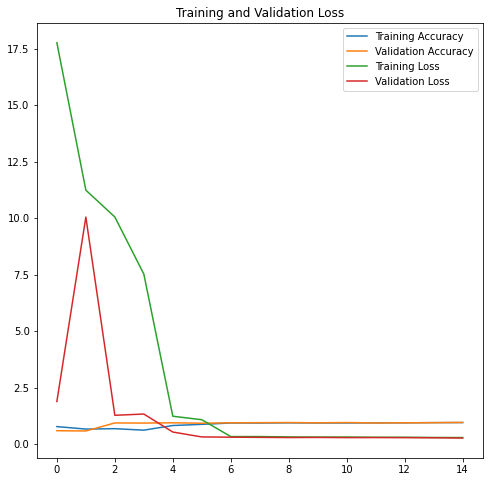

In [ ]:
epochs=15
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()

#**Question 1c: What effect does the optimisation function have on network performance?**

#Optimizer: RMSprop

In [ ]:
model = Sequential()
model.add(Dense(units=1000, kernel_initializer='uniform', activation='sigmoid', input_shape=(4,)))
model.add(Dense(units=100,kernel_initializer='uniform', activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

model.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 1000)              5000      
                                                                 
 dense_50 (Dense)            (None, 100)               100100    
                                                                 
 dropout_20 (Dropout)        (None, 100)               0         
                                                                 
 dense_51 (Dense)            (None, 1)                 101       
                                                                 
Total params: 105,201
Trainable params: 105,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start= time.time()
history = model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
end= time.time()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Time taken:', end-start)

Epoch 1/10
42/42 [==============================] - 1s 9ms/step - loss: 0.3291 - accuracy: 0.8882 - val_loss: 0.2731 - val_accuracy: 0.9337
Epoch 2/10
42/42 [==============================] - 0s 5ms/step - loss: 0.2200 - accuracy: 0.9411 - val_loss: 0.1836 - val_accuracy: 0.9458
Epoch 3/10
42/42 [==============================] - 0s 5ms/step - loss: 0.1666 - accuracy: 0.9607 - val_loss: 0.1799 - val_accuracy: 0.9458
Epoch 4/10
42/42 [==============================] - 0s 5ms/step - loss: 0.1818 - accuracy: 0.9486 - val_loss: 0.1609 - val_accuracy: 0.9639
Epoch 5/10
42/42 [==============================] - 0s 5ms/step - loss: 0.1621 - accuracy: 0.9577 - val_loss: 0.1627 - val_accuracy: 0.9639
Epoch 6/10
42/42 [==============================] - 0s 5ms/step - loss: 0.1664 - accuracy: 0.9502 - val_loss: 0.1309 - val_accuracy: 0.9699
Epoch 7/10
42/42 [==============================] - 0s 5ms/step - loss: 0.1625 - accuracy: 0.9502 - val_loss: 0.1392 - val_accuracy: 0.9639
Epoch 8/10
42/42 [==

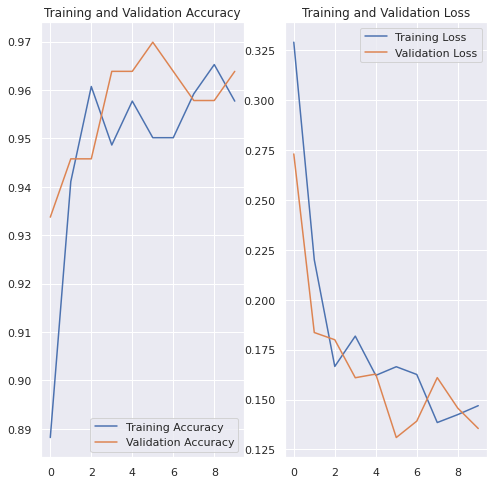

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn_Adadelta.pdf", dpi=100)
plt.show()

#**Optimizer: Adam**

In [ ]:
model = Sequential()
model.add(Dense(units=1000, activation='sigmoid', input_shape=(4,)))
model.add(Dense(units=100, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy',
optimizer='adam',
metrics=['accuracy'])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 1000)              5000      
                                                                 
 dense_41 (Dense)            (None, 100)               100100    
                                                                 
 dropout_17 (Dropout)        (None, 100)               0         
                                                                 
 dense_42 (Dense)            (None, 1)                 101       
                                                                 
Total params: 105,201
Trainable params: 105,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start= time.time()
history = model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
end= time.time()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Time taken:', end-start)

Epoch 1/10
42/42 [==============================] - 1s 16ms/step - loss: 0.3199 - accuracy: 0.8837 - val_loss: 0.2042 - val_accuracy: 0.9217
Epoch 2/10
42/42 [==============================] - 0s 11ms/step - loss: 0.1847 - accuracy: 0.9441 - val_loss: 0.1679 - val_accuracy: 0.9398
Epoch 3/10
42/42 [==============================] - 0s 9ms/step - loss: 0.1769 - accuracy: 0.9486 - val_loss: 0.1661 - val_accuracy: 0.9398
Epoch 4/10
42/42 [==============================] - 0s 8ms/step - loss: 0.1627 - accuracy: 0.9502 - val_loss: 0.1491 - val_accuracy: 0.9578
Epoch 5/10
42/42 [==============================] - 0s 10ms/step - loss: 0.1743 - accuracy: 0.9502 - val_loss: 0.1577 - val_accuracy: 0.9398
Epoch 6/10
42/42 [==============================] - 0s 11ms/step - loss: 0.1726 - accuracy: 0.9456 - val_loss: 0.1477 - val_accuracy: 0.9518
Epoch 7/10
42/42 [==============================] - 0s 10ms/step - loss: 0.1652 - accuracy: 0.9502 - val_loss: 0.1668 - val_accuracy: 0.9518
Epoch 8/10
42/4

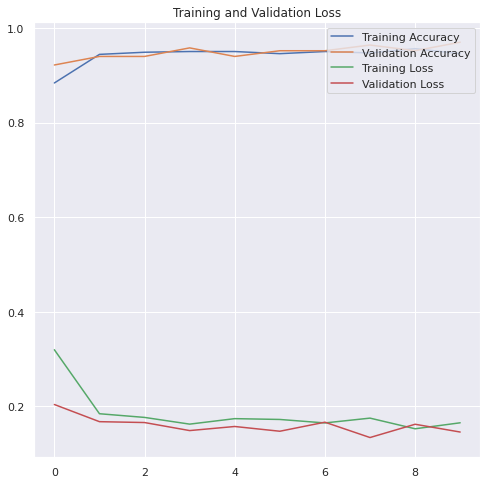

In [ ]:
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()

#Optimizer: SGD

In [ ]:
model = Sequential()
model.add(Dense(units=1000, kernel_initializer='uniform', activation='relu', input_shape=(4,)))
model.add(Dense(units=100,kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1000)              5000      
                                                                 
 dense_20 (Dense)            (None, 100)               100100    
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 1)                 101       
                                                                 
Total params: 105,201
Trainable params: 105,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start= time.time()
history = model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
end= time.time()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Time taken:', end-start)

Epoch 1/10
42/42 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.7674 - val_loss: nan - val_accuracy: 0.8855
Epoch 2/10
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.8852 - val_loss: nan - val_accuracy: 0.8855
Epoch 3/10
42/42 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.8852 - val_loss: nan - val_accuracy: 0.8855
Epoch 4/10
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.8852 - val_loss: nan - val_accuracy: 0.8855
Epoch 5/10
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.8852 - val_loss: nan - val_accuracy: 0.8855
Epoch 6/10
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.8852 - val_loss: nan - val_accuracy: 0.8855
Epoch 7/10
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.8852 - val_loss: nan - val_accuracy: 0.8855
Epoch 8/10
42/42 [==============================] - 0s 4ms/ste

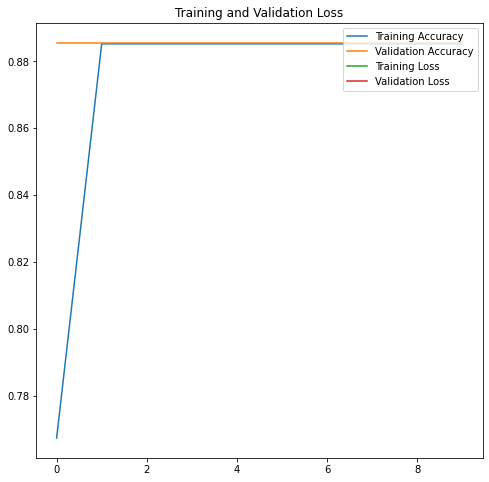

In [ ]:
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()

# Optimizer: Adadelta

In [ ]:
model = Sequential()
model.add(Dense(units=1000, kernel_initializer='uniform', activation='relu', input_shape=(4,)))
model.add(Dense(units=100,kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

model.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1000)              5000      
                                                                 
 dense_23 (Dense)            (None, 100)               100100    
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_24 (Dense)            (None, 1)                 101       
                                                                 
Total params: 105,201
Trainable params: 105,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start= time.time()
history = model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
end= time.time()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Time taken:', end-start)

Epoch 1/10
42/42 [==============================] - 1s 8ms/step - loss: 5.9312 - accuracy: 0.6994 - val_loss: 0.7469 - val_accuracy: 0.5663
Epoch 2/10
42/42 [==============================] - 0s 4ms/step - loss: 8.6322 - accuracy: 0.6903 - val_loss: 0.7572 - val_accuracy: 0.5602
Epoch 3/10
42/42 [==============================] - 0s 5ms/step - loss: 3.2965 - accuracy: 0.7054 - val_loss: 0.6832 - val_accuracy: 0.6024
Epoch 4/10
42/42 [==============================] - 0s 4ms/step - loss: 3.4843 - accuracy: 0.7356 - val_loss: 0.7718 - val_accuracy: 0.8976
Epoch 5/10
42/42 [==============================] - 0s 4ms/step - loss: 6.6315 - accuracy: 0.7024 - val_loss: 0.7759 - val_accuracy: 0.9036
Epoch 6/10
42/42 [==============================] - 0s 5ms/step - loss: 3.5223 - accuracy: 0.6888 - val_loss: 0.8533 - val_accuracy: 0.9036
Epoch 7/10
42/42 [==============================] - 0s 4ms/step - loss: 4.4528 - accuracy: 0.6903 - val_loss: 0.8054 - val_accuracy: 0.9036
Epoch 8/10
42/42 [==

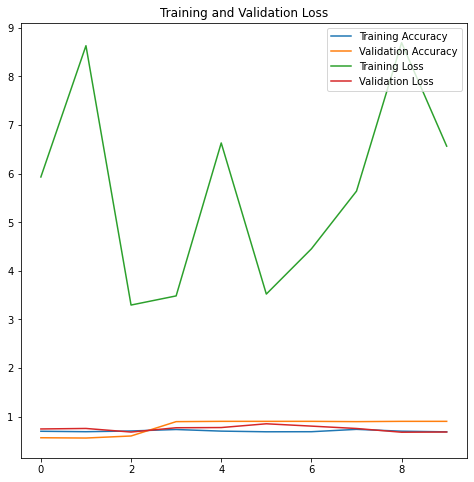

In [ ]:
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()

#**4 HIDDEN LAYERS WITH SIGMOID ACTIVATION and ADAM OPTIMIZER**

In [ ]:
model = Sequential()
model.add(Dense(units=2000, activation='relu', input_shape=(4,)))
model.add(Dropout(0.5))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 2000)              10000     
                                                                 
 dropout_21 (Dropout)        (None, 2000)              0         
                                                                 
 dense_53 (Dense)            (None, 100)               200100    
                                                                 
 dense_54 (Dense)            (None, 20)                2020      
                                                                 
 dense_55 (Dense)            (None, 20)                420       
                                                                 
 dense_56 (Dense)            (None, 5)                 105       
                                                                 
 dropout_22 (Dropout)        (None, 5)               

In [ ]:
start= time.time()
history = model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
end= time.time()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Time taken:', end-start)

Epoch 1/10
42/42 [==============================] - 1s 10ms/step - loss: 5.9745 - accuracy: 0.8867 - val_loss: 0.6711 - val_accuracy: 0.8976
Epoch 2/10
42/42 [==============================] - 0s 6ms/step - loss: 0.6623 - accuracy: 0.8973 - val_loss: 0.6629 - val_accuracy: 0.8855
Epoch 3/10
42/42 [==============================] - 0s 6ms/step - loss: 0.6470 - accuracy: 0.8973 - val_loss: 0.6439 - val_accuracy: 0.8916
Epoch 4/10
42/42 [==============================] - 0s 6ms/step - loss: 0.6351 - accuracy: 0.8973 - val_loss: 0.6347 - val_accuracy: 0.8855
Epoch 5/10
42/42 [==============================] - 0s 7ms/step - loss: 0.6204 - accuracy: 0.8943 - val_loss: 0.6216 - val_accuracy: 0.8855
Epoch 6/10
42/42 [==============================] - 0s 6ms/step - loss: 0.6070 - accuracy: 0.8958 - val_loss: 0.6090 - val_accuracy: 0.8855
Epoch 7/10
42/42 [==============================] - 0s 7ms/step - loss: 0.5943 - accuracy: 0.8958 - val_loss: 0.5968 - val_accuracy: 0.8855
Epoch 8/10
42/42 [=

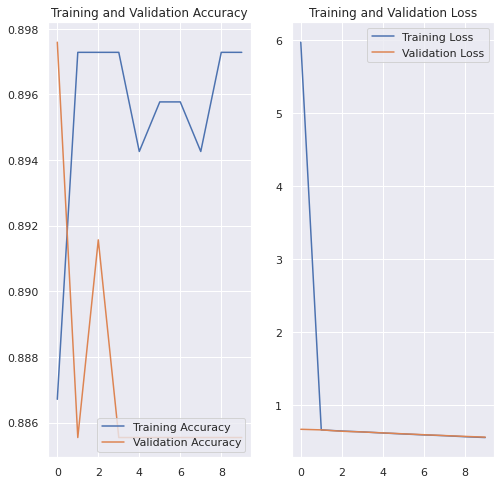

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn_Adadelta.pdf", dpi=100)
plt.show()

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y["thresholds_reached"] == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y["thresholds_reached"] == 0)))

Before OverSampling, counts of label '1': 95
Before OverSampling, counts of label '0': 733 



In [ ]:
# from collections import Counter
# from sklearn.svm import LinearSVC
# from imblearn.pipeline import make_pipeline
# from imblearn.base import BaseSampler
# from imblearn.over_sampling import (SMOTE, RandomOverSampler)
# !pip install imbalanced-learn
# import imblearn
# from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(x, y["thresholds_reached"].ravel())

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (1466, 4)
After OverSampling, the shape of train_y: (1466,) 



In [ ]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '1': 733
After OverSampling, counts of label '0': 733


#**graphical plot of the data**

0                                          Alexandrium spp. \ncells L-1\n(PSP)  \
0                                                                                
Alexandrium spp. \ncells L-1\n(PSP)                                   1.000000   
Dinophysiaceae \ncells L-1\n(DSP)                                     0.055174   
Prorocentrum lima \ncells L-1\n(DSP)                                 -0.008287   
Pseudo-nitzschia spp. \ncells L-1\n(ASP)                              0.019008   
NaN                                                                        NaN   
NaN                                                                        NaN   
thresholds_reached                                                    0.455902   

0                                          Dinophysiaceae \ncells L-1\n(DSP)  \
0                                                                              
Alexandrium spp. \ncells L-1\n(PSP)                                 0.055174   
Dinophysiaceae \ncell

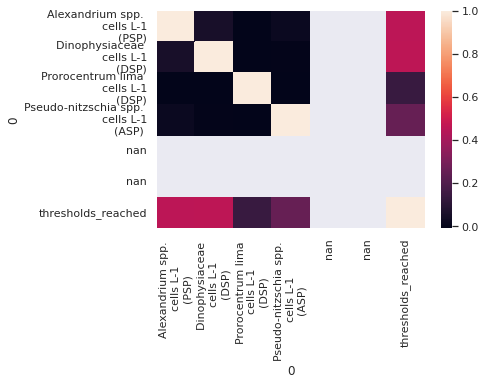

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
corrMatrix = df.corr()
print (corrMatrix)
ax = sns.heatmap(corrMatrix)

0                                          Alexandrium spp. \ncells L-1\n(PSP)  \
0                                                                                
Alexandrium spp. \ncells L-1\n(PSP)                                   1.000000   
Dinophysiaceae \ncells L-1\n(DSP)                                     0.055174   
Prorocentrum lima \ncells L-1\n(DSP)                                 -0.008287   
Pseudo-nitzschia spp. \ncells L-1\n(ASP)                              0.019008   
NaN                                                                        NaN   
NaN                                                                        NaN   
thresholds_reached                                                    0.455902   

0                                          Dinophysiaceae \ncells L-1\n(DSP)  \
0                                                                              
Alexandrium spp. \ncells L-1\n(PSP)                                 0.055174   
Dinophysiaceae \ncell

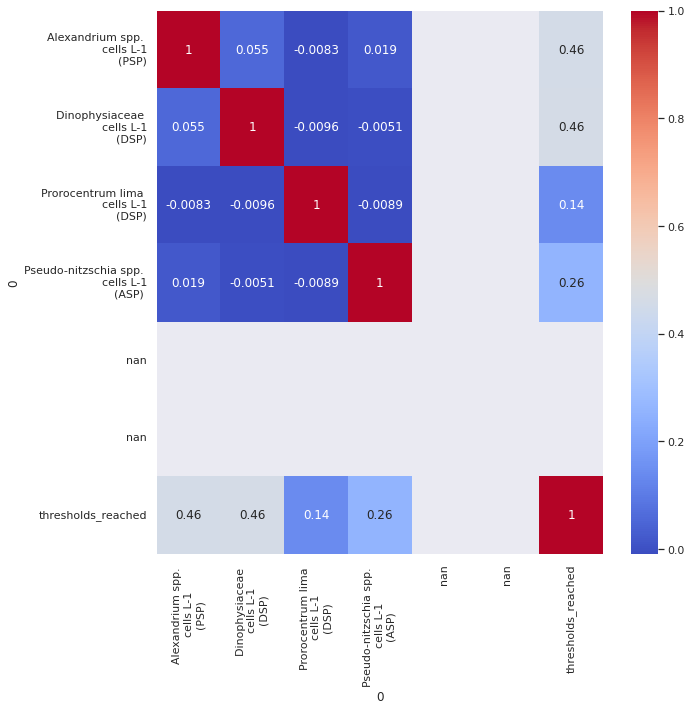

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
corrMatrix = df.corr()
print (corrMatrix)
plt.figure(figsize=(10,10))
ax = sns.heatmap(corrMatrix, annot = True, cmap = 'coolwarm')